In [0]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers import BatchNormalization
from keras.callbacks import LearningRateScheduler
import sklearn
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import numpy as np


batch_size = 200
num_classes = 10
epochs = 12

# CREATE MORE IMAGES VIA DATA AUGMENTATION
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# standardization
avg1 = np.mean(x_train)
avg2 = np.mean(x_test)
std1 = np.std(x_train)
std2 = np.std(x_test)
x_train = (x_train-avg1)/std1
x_test = (x_test-avg2)/std2

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          )
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 222us/step - loss: 0.2886 - acc: 0.9172 - val_loss: 0.0527 - val_acc: 0.9817
Epoch 2/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.0940 - acc: 0.9728 - val_loss: 0.0427 - val_acc: 0.9857
Epoch 3/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.0713 - acc: 0.9799 - val_loss: 0.0439 - val_acc: 0.9863
Epoch 4/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.0571 - acc: 0.9836 - val_loss: 0.0337 - val_acc: 0.9894
Epoch 5/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.0508 - acc: 0.9854 - val_loss: 0.0457 - val_acc: 0.9887
Epoch 6/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.0404 - acc: 0.9883 - val_loss: 0.0311 - val_acc: 0.9908
Epoch 7/12
60000/60000 [========================

In [0]:
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

[[ 977    0    1    0    0    0    1    0    0    1]
 [   0 1133    0    1    0    0    0    1    0    0]
 [   1    1 1025    1    1    0    1    2    0    0]
 [   0    0    1 1007    0    2    0    0    0    0]
 [   0    0    0    0  972    0    0    2    3    5]
 [   0    0    0    4    0  887    1    0    0    0]
 [   1    3    0    0    0    6  948    0    0    0]
 [   0    4    3    0    0    0    0 1020    0    1]
 [   0    0    0    1    0    1    0    1  966    5]
 [   0    0    0    1    1    3    0    1    1 1002]]
Confusion matrix, without normalization


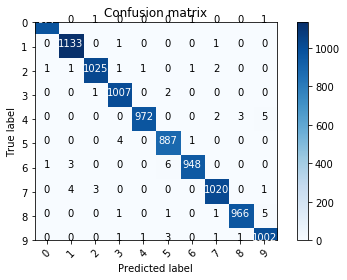

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

y_predict = model.predict(x_test)
y_predict = np.argmax(y_predict,axis=1)
y_test = np.argmax(y_test,axis=1)
cfm = confusion_matrix(y_test, y_predict)
print(cfm)
plot_confusion_matrix(cfm, classes=range(10), 
                      title='Confusion matrix')